<a href="https://colab.research.google.com/github/SoumyadeepB/Reinforcement-Learning/blob/master/N_step_Sarsa.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import gym
import numpy as np
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm
%matplotlib inline


In [0]:
def nstep_sarsa(env, n=1, alpha=0.1, gamma=0.9, epsilon=0.1, num_ep=int(1e4)):

    """ TODO: implement the n-step sarsa algorithm """
    
    total_episode_length = 0
    for ep in tqdm(range(num_ep)):      
      state = env.reset()
      obs = env.reset()
      n_states = env.observation_space.n
      n_actions = env.action_space.n
      Q = np.random.rand(n_states,n_actions)   # Initializing random Q values for each (s,a)
      Q[-1,:] = 0                              # Setting final state values to 0
      policy = np.argmax(Q,axis=1)             # Greedy policy based on the random Q(s,a)     

      done = False
      t = 0
      tau = 0
      G=0
      T = np.inf

      states = [0]
      actions = [policy[0]]
      rewards = [0]
      
      while not done:
        if t < T:
          A = actions[t]   # take action A_t
          S , R , done , _ =  env.step(A)
          states.append(S)
          actions.append(A)
          rewards.append(R)

          if done:
            T = t+1
          else:
            actions.append(policy[S])  # action corresponding to current state S

        tau = t - n + 1
        if tau >= 0:
          for i in range(tau+1,min((tau+n,T))):
            R_i = rewards[i]
            G += ((gamma ** (i-tau-1)) * R_i)
          
          if (tau+n) < T:
            G = G + (gamma**n) * Q[states[tau+n], actions[tau+n]]

          Q[states[tau],actions[tau]] += alpha * (G - Q[states[tau], actions[tau]])
          e = np.random.rand()
          if e > epsilon:
            policy = np.argmax(Q,axis=1) # Update Policy (eps-Greedy)
          else:
            policy = np.random.randint(n_actions, size=n_states)

        t += 1

      
      total_episode_length += t
        
    avg_ep_length = (total_episode_length/num_ep) 
    print("N =",n," ||  α = {:.2f}".format(alpha)," || Avg. Episode_length =",avg_ep_length)
    return avg_ep_length


In [17]:
env=gym.make('FrozenLake-v0', map_name="8x8")
# TODO: run multiple times, evaluate the performance for different n and alpha
alphas = np.linspace(0.1,1,10)
lst = []
for n in range(10):
  for alpha in alphas:
    avg_ep_length = nstep_sarsa(env, n=n, alpha=alpha)
    lst.append((n,alpha,avg_ep_length))


N = 0  ||  α = 0.10  || Avg. Episode_length = 42.5579



N = 0  ||  α = 0.20  || Avg. Episode_length = 43.6077



N = 0  ||  α = 0.30  || Avg. Episode_length = 43.5213



N = 0  ||  α = 0.40  || Avg. Episode_length = 43.4719



N = 0  ||  α = 0.50  || Avg. Episode_length = 43.6751



N = 0  ||  α = 0.60  || Avg. Episode_length = 43.3998



N = 0  ||  α = 0.70  || Avg. Episode_length = 42.8438



N = 0  ||  α = 0.80  || Avg. Episode_length = 43.1029



N = 0  ||  α = 0.90  || Avg. Episode_length = 43.3428



N = 0  ||  α = 1.00  || Avg. Episode_length = 42.6779



N = 1  ||  α = 0.10  || Avg. Episode_length = 41.3856



N = 1  ||  α = 0.20  || Avg. Episode_length = 42.0586



N = 1  ||  α = 0.30  || Avg. Episode_length = 41.2159



N = 1  ||  α = 0.40  || Avg. Episode_length = 40.9272



N = 1  ||  α = 0.50  || Avg. Episode_length = 41.2959



N = 1  ||  α = 0.60  || Avg. Episode_length = 40.8772



N = 1  ||  α = 0.70  || Avg. Episode_length = 40.3222



N = 1  ||  α = 0.80  || Avg. Episode_length = 40.1823



N = 1  ||  α = 0.90  || Avg. Episode_length = 40.4869



N = 1  ||  α = 1.00  || Avg. Episode_length = 39.7494



N = 2  ||  α = 0.10  || Avg. Episode_length = 40.7207



N = 2  ||  α = 0.20  || Avg. Episode_length = 41.7349



N = 2  ||  α = 0.30  || Avg. Episode_length = 41.0858



N = 2  ||  α = 0.40  || Avg. Episode_length = 41.1076



N = 2  ||  α = 0.50  || Avg. Episode_length = 40.5048



N = 2  ||  α = 0.60  || Avg. Episode_length = 40.4813



N = 2  ||  α = 0.70  || Avg. Episode_length = 40.2042



N = 2  ||  α = 0.80  || Avg. Episode_length = 39.8718



N = 2  ||  α = 0.90  || Avg. Episode_length = 39.4699



N = 2  ||  α = 1.00  || Avg. Episode_length = 39.2479



N = 3  ||  α = 0.10  || Avg. Episode_length = 40.5192



N = 3  ||  α = 0.20  || Avg. Episode_length = 40.6333



N = 3  ||  α = 0.30  || Avg. Episode_length = 40.564



N = 3  ||  α = 0.40  || Avg. Episode_length = 41.101



N = 3  ||  α = 0.50  || Avg. Episode_length = 40.1941



N = 3  ||  α = 0.60  || Avg. Episode_length = 40.2703



N = 3  ||  α = 0.70  || Avg. Episode_length = 39.5037



N = 3  ||  α = 0.80  || Avg. Episode_length = 40.0761



N = 3  ||  α = 0.90  || Avg. Episode_length = 39.4303



N = 3  ||  α = 1.00  || Avg. Episode_length = 39.6265



N = 4  ||  α = 0.10  || Avg. Episode_length = 39.94



N = 4  ||  α = 0.20  || Avg. Episode_length = 39.9347



N = 4  ||  α = 0.30  || Avg. Episode_length = 40.4346



N = 4  ||  α = 0.40  || Avg. Episode_length = 39.9686



N = 4  ||  α = 0.50  || Avg. Episode_length = 40.1034



N = 4  ||  α = 0.60  || Avg. Episode_length = 39.8912



N = 4  ||  α = 0.70  || Avg. Episode_length = 39.693



N = 4  ||  α = 0.80  || Avg. Episode_length = 39.1035



N = 4  ||  α = 0.90  || Avg. Episode_length = 39.4489



N = 4  ||  α = 1.00  || Avg. Episode_length = 39.7403



N = 5  ||  α = 0.10  || Avg. Episode_length = 39.8844



N = 5  ||  α = 0.20  || Avg. Episode_length = 39.9754



N = 5  ||  α = 0.30  || Avg. Episode_length = 39.8



N = 5  ||  α = 0.40  || Avg. Episode_length = 40.0867



N = 5  ||  α = 0.50  || Avg. Episode_length = 40.1512



N = 5  ||  α = 0.60  || Avg. Episode_length = 39.6469



N = 5  ||  α = 0.70  || Avg. Episode_length = 39.4954



N = 5  ||  α = 0.80  || Avg. Episode_length = 39.823



N = 5  ||  α = 0.90  || Avg. Episode_length = 39.6485



N = 5  ||  α = 1.00  || Avg. Episode_length = 39.4627



N = 6  ||  α = 0.10  || Avg. Episode_length = 39.9748



N = 6  ||  α = 0.20  || Avg. Episode_length = 40.0471



N = 6  ||  α = 0.30  || Avg. Episode_length = 40.2546



N = 6  ||  α = 0.40  || Avg. Episode_length = 40.0362



N = 6  ||  α = 0.50  || Avg. Episode_length = 39.2956



N = 6  ||  α = 0.60  || Avg. Episode_length = 39.6846



N = 6  ||  α = 0.70  || Avg. Episode_length = 39.2948



N = 6  ||  α = 0.80  || Avg. Episode_length = 39.2504



N = 6  ||  α = 0.90  || Avg. Episode_length = 39.4878



N = 6  ||  α = 1.00  || Avg. Episode_length = 39.4277



N = 7  ||  α = 0.10  || Avg. Episode_length = 40.0121



N = 7  ||  α = 0.20  || Avg. Episode_length = 40.1308



N = 7  ||  α = 0.30  || Avg. Episode_length = 39.7638



N = 7  ||  α = 0.40  || Avg. Episode_length = 39.9262



N = 7  ||  α = 0.50  || Avg. Episode_length = 39.7376



N = 7  ||  α = 0.60  || Avg. Episode_length = 39.2832



N = 7  ||  α = 0.70  || Avg. Episode_length = 39.5773



N = 7  ||  α = 0.80  || Avg. Episode_length = 39.6646



N = 7  ||  α = 0.90  || Avg. Episode_length = 39.1533



N = 7  ||  α = 1.00  || Avg. Episode_length = 38.7454



N = 8  ||  α = 0.10  || Avg. Episode_length = 39.4566



N = 8  ||  α = 0.20  || Avg. Episode_length = 39.9239



N = 8  ||  α = 0.30  || Avg. Episode_length = 39.2462



N = 8  ||  α = 0.40  || Avg. Episode_length = 39.8785



N = 8  ||  α = 0.50  || Avg. Episode_length = 39.6527



N = 8  ||  α = 0.60  || Avg. Episode_length = 39.9495



N = 8  ||  α = 0.70  || Avg. Episode_length = 39.3255



N = 8  ||  α = 0.80  || Avg. Episode_length = 39.5738



N = 8  ||  α = 0.90  || Avg. Episode_length = 38.8276



N = 8  ||  α = 1.00  || Avg. Episode_length = 39.041



N = 9  ||  α = 0.10  || Avg. Episode_length = 39.9047



N = 9  ||  α = 0.20  || Avg. Episode_length = 39.5884



N = 9  ||  α = 0.30  || Avg. Episode_length = 39.7736



N = 9  ||  α = 0.40  || Avg. Episode_length = 39.4361



N = 9  ||  α = 0.50  || Avg. Episode_length = 38.8966



N = 9  ||  α = 0.60  || Avg. Episode_length = 39.1827



N = 9  ||  α = 0.70  || Avg. Episode_length = 39.1664



N = 9  ||  α = 0.80  || Avg. Episode_length = 39.4865



N = 9  ||  α = 0.90  || Avg. Episode_length = 39.4572



N = 9  ||  α = 1.00  || Avg. Episode_length = 39.0351


In [0]:
L = []
lst1 = [(alpha,ep) for _,alpha,ep in lst]
for i in range(10):
  L.append(lst1[i*10:(i+1)*10])


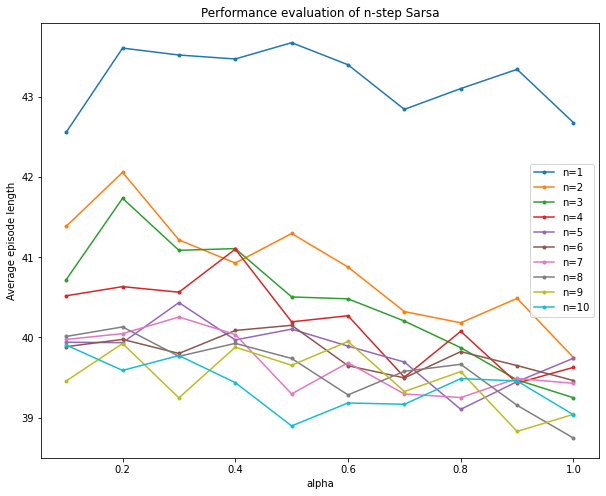

In [21]:
%matplotlib inline
plt.figure(figsize=(10,8))
n=1
for l in L:
  x = []
  y = []
  for alpha,ep in l:
    x.append(alpha)
    y.append(ep)

  plt.plot(x,y,'.-',label="n={}".format(n))
  n +=1

plt.title("Performance evaluation of n-step Sarsa")
plt.xlabel("alpha")
plt.ylabel("Average episode length")
plt.legend()
plt.show()
  


In [0]:
n_states = env.observation_space.n
n_actions = env.action_space.n
Q = np.random.rand(n_states,n_actions)

In [0]:
Q[-1,:]=0

In [12]:
Q

array([[0.21509552, 0.14244709, 0.73220502, 0.29018765],
       [0.23503507, 0.60341884, 0.05127128, 0.38313611],
       [0.1326047 , 0.8243849 , 0.70478875, 0.73156875],
       [0.67701026, 0.71533842, 0.05727441, 0.29459493],
       [0.79524745, 0.06369445, 0.19447491, 0.72337908],
       [0.26258688, 0.75134357, 0.82034746, 0.07708685],
       [0.75560632, 0.56863914, 0.70927216, 0.88541918],
       [0.13297964, 0.65190965, 0.55132239, 0.32100196],
       [0.1937933 , 0.17606391, 0.41957706, 0.00905626],
       [0.76344314, 0.64788189, 0.47798782, 0.01220491],
       [0.21660451, 0.64423838, 0.91814147, 0.50778638],
       [0.49280754, 0.55936531, 0.4788027 , 0.059572  ],
       [0.80636911, 0.39544706, 0.52252496, 0.42291485],
       [0.34133359, 0.16902649, 0.88547312, 0.237924  ],
       [0.40305713, 0.05914484, 0.42425567, 0.66685375],
       [0.08255965, 0.04141971, 0.99207731, 0.32825114],
       [0.9804864 , 0.99556261, 0.13708134, 0.51785426],
       [0.94823373, 0.09579157,